## UNG Physics Department Graduation Statistics

Graduation statistics for the UNG Physics Department from spring 2000 &ndash; spring 2018.

In [1]:
%matplotlib inline
import numpy as np
import fileinput as fi
import matplotlib.pyplot as plt

Load data from a CSV file. A spreadsheet with graduation data is maintained in the Physics Department both as a digital file and hardcopies for each individual student (contact: Robin Webber, robin.webber@ung.edu) and a spreadsheet is maintained on Google Drive (personal information redacted; contact: Gregory Feiden, gregory.feiden@ung.edu).

In [2]:
grads = [entry.rstrip("\r\n").split(",") for entry in fi.input("data/physics_grad_rate.csv") if entry.split(",")[0] != ""]

The first row in ```grads``` contains header information. There are four columns of data, which are

In [3]:
grads.pop(0)

['Grad Year', 'Total Time', 'Degree', 'Transfer']

We've now removed the header information, but display it above for reference. We can now convert the data from a list to a numpy array.

In [4]:
grads = np.array(grads)

As a first look, we can display a histogram of the number of graduates per year. The year is contained in column 0. To ensure we only group by year, we hardcode the bins.

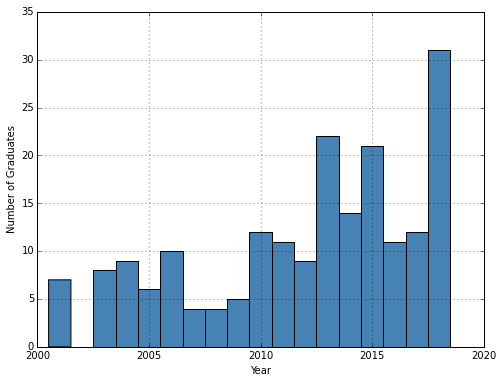

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

N_year, Year, tmp = ax.hist(grads[:,0].astype(float), bins=range(2000, 2019, 1), histtype="bar", 
                            align="right", color="steelblue")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Graduates")
ax.grid()

Now we can look at how long it takes our graduates to earn their degree.

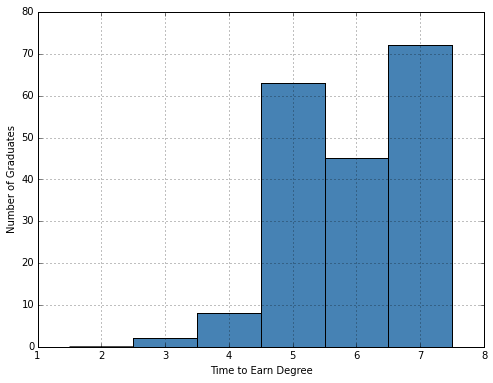

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

N_time, t_degree, tmp = ax.hist(grads[:,1].astype(float), bins=range(1, 8, 1), histtype="bar", 
                                align="right", color="steelblue")
ax.set_xlabel("Time to Earn Degree")
ax.set_ylabel("Number of Graduates")
ax.grid()

In [7]:
print "Based on this data, we find that {:.0f} students, or {:2.0f}%, graduate within 6 years.".format(
      len([x for x in grads[:,1].astype(float) if x < 7]), 
      float(100.*len([x for x in grads[:,1].astype(float) if x < 7]))/float(len(grads[:,1])))

Based on this data, we find that 146 students, or 74%, graduate within 6 years.


Compare this to UNG's average 6-year graduation rate of 53% for its 2008 &ndash; 2011 cohorts. The Physics Department exceeds the institutional average and also exeeds the institution's long-term goal of 60%. 

However, the data represent all graduates from the physics department, including transfers. Transfer students present an interesting situation for graduate rates. For the purposes of our data, we consider the time to graduation as including *all* time spent at another institution following the student's high school graduation year (or GED year). If we remove transfer students from our statistics and consider *only* students that we advise from their initial year at UNG, we find different results. 

In [8]:
fi.close()
ung_only = [entry.rstrip("\r\n").split(",") for entry in fi.input("data/physics_grad_rate.csv") \
            if (entry.split(",")[0] != "" and entry.split(",")[3] != "T\r\n")]
tmp = ung_only.pop(0)

ung_only = np.array(ung_only)

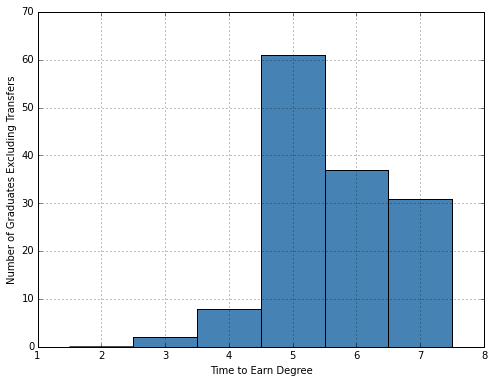

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

N_time, t_degree, tmp = ax.hist(ung_only[:,1].astype(float), bins=range(1, 8, 1), histtype="bar", 
                                align="right", color="steelblue")
ax.set_xlabel("Time to Earn Degree")
ax.set_ylabel("Number of Graduates Excluding Transfers")
ax.grid()

fig.savefig("figs/6_year_grad_rate_noT.pdf")

In [11]:
print len([x for x in ung_only[:,1].astype(float) if x < 7]), \
      float(100.*len([x for x in ung_only[:,1].astype(float) if x < 7]))/float(len(ung_only[:,1]))

131 90.9722222222


These data indicate that the 6-year graduation rate for our physics majors is approximately 91%. This does not count student currently enrolled, which could affect the gradation rate. [SEE ROBIN FOR LIST OF CURRENT MAJORS AND THE TIME THEY'VE BEEN AT UNG]. 

A direct comparison would look at only the 2008 &ndash; 2011 cohorts. [TO DO]

We only see that it is quite typical for our students to take about 5 years. To understand this, we must consider that not all of our majors are purely physics majors. This number includes double majors (XX%), typically physics and math, and dual-degree students, who earn a degree in engineering (typically at GA Tech) and physics (at UNG). Dual-degree students make up XX% of our graduates.